In [2]:
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal
import pandas as pd 

# Getting Data and Organizing Data

In [3]:
hit_df = pd.read_csv('/Users/244213/Desktop/DataAnalytics/Stats/2018_MLB_Hitting_Stats.txt', delim_whitespace=True)

pitch_df = pd.read_csv('/Users/244213/Desktop/DataAnalytics/Stats/2018_MLB_Pitching_Stats_II.txt', delim_whitespace=True)

win_percentage_hitting_list = hit_df['WPCT']
win_percentage_pitch_list = pitch_df['WPCT']

# Hitting data 
hitting_stats = {}

obp = hit_df['OBP']
slg = hit_df['SLG']
bat_avg = hit_df['AVG']
rbi = hit_df['RBI']

hitting_stats['obp'] = obp
hitting_stats['slg'] = slg
hitting_stats['bat_avg'] = bat_avg
hitting_stats['rbi'] = rbi

# Pitching data
pitching_stats = {}

era = pitch_df['ERA']
so = pitch_df['SO']
walks = pitch_df['BB']
walks_and_hits = pitch_df['WHIP']

pitching_stats['era'] = era
pitching_stats['so'] = so
pitching_stats['walks'] = walks
pitching_stats['walks_and_hits'] = walks_and_hits

/var/folders/zl/1yvl8k952d78qdldsvvhkwkdyc7vfd/T/ipykernel_918/2481715412.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hit_df = pd.read_csv('/Users/244213/Desktop/DataAnalytics/Stats/2018_MLB_Hitting_Stats.txt', delim_whitespace=True)
/var/folders/zl/1yvl8k952d78qdldsvvhkwkdyc7vfd/T/ipykernel_918/2481715412.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pitch_df = pd.read_csv('/Users/244213/Desktop/DataAnalytics/Stats/2018_MLB_Pitching_Stats_II.txt', delim_whitespace=True)


# Correlation Coefficients for the Stats

In [4]:
# Hitting Stats CCs
hitting_stats_cc = {}

obp_correlation_coefficient = dal.find_data_correlation(obp, win_percentage_hitting_list)
slg_correlation_coefficient = dal.find_data_correlation(slg, win_percentage_hitting_list)
bat_avg_correlation_coefficient = dal.find_data_correlation(bat_avg, win_percentage_hitting_list)
rbi_correlation_coefficient = dal.find_data_correlation(rbi, win_percentage_hitting_list)

hitting_stats_cc['OBP_CC'] = obp_correlation_coefficient
hitting_stats_cc['SLG_CC'] = slg_correlation_coefficient
hitting_stats_cc['AVG_CC'] = bat_avg_correlation_coefficient
hitting_stats_cc['RBI_CC'] = rbi_correlation_coefficient


# Pitching Stats CCs
pitching_stats_cc = {}

era_correlation_coefficient = dal.find_data_correlation(era, win_percentage_pitch_list)
so_correlation_coefficient = dal.find_data_correlation(so, win_percentage_pitch_list)
walks_correlation_coefficient = dal.find_data_correlation(walks, win_percentage_pitch_list)
walks_and_hits_correlation_coefficient = dal.find_data_correlation(walks_and_hits, win_percentage_pitch_list)

pitching_stats_cc['ERA_CC'] = era_correlation_coefficient
pitching_stats_cc['SO_CC'] = so_correlation_coefficient
pitching_stats_cc['BB_CC'] = walks_correlation_coefficient
pitching_stats_cc['WHIP_CC'] = walks_and_hits_correlation_coefficient

# Making Data Table
hitting_df = pd.DataFrame(hitting_stats_cc, index = range(1))
# hitting_df

pitching_df = pd.DataFrame(pitching_stats_cc, index = range(1))
# pitching_df

# Graphing Linear Regression 

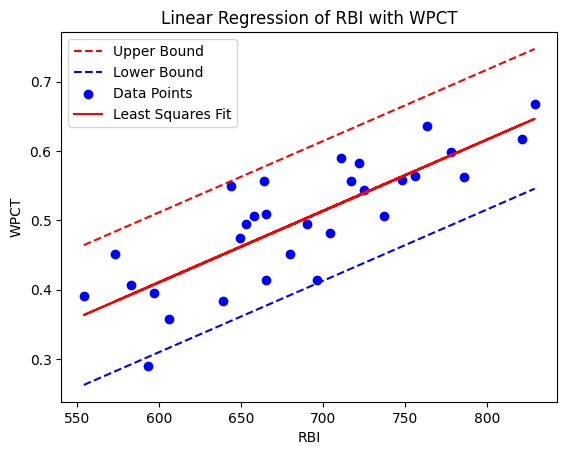

In [5]:
# RBI has the highest correlation coefficient, so I graph it

residual_fit, mean_of_residual, residual_standard_dev = dal.calculate_residuals(rbi, win_percentage_hitting_list, 1)
slope_intercept = dal.least_squares_coefficient(rbi, win_percentage_hitting_list)
upper_boundy, upper_boundx, lower_boundx, lower_boundy = dal.error_bar_bounds(rbi, mean_of_residual, residual_standard_dev, slope_intercept)

plt.plot(upper_boundx, upper_boundy, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(lower_boundx, lower_boundy, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(rbi, win_percentage_hitting_list, x_axis = 'RBI', y_axis = 'WPCT', title = 'Linear Regression of RBI with WPCT')

[[np.float64(0.0009520148358431735), np.float64(-0.14981630723205086)]]


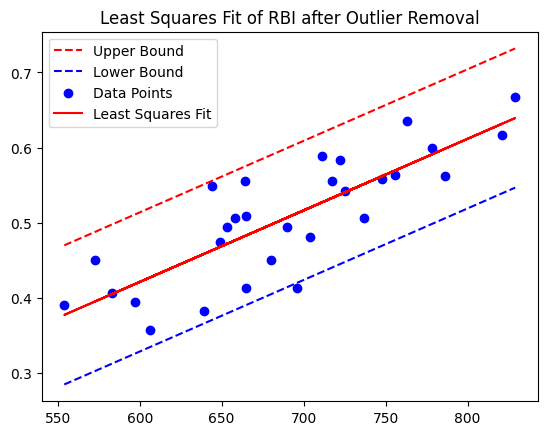

In [6]:
# After removing outliers
outliers = dal.determine_outliers(residual_fit, mean_of_residual, residual_standard_dev, n = 2)

new_rbi, new_wpct = dal.remove_outliers(rbi, win_percentage_hitting_list, outliers)

slope_intercept_new = dal.least_squares_coefficient(np.array(new_rbi), np.array(new_wpct))
residual_data_new, mean_of_residual_new, residual_standard_dev_new = dal.calculate_residuals(new_rbi, new_wpct)

upper_boundy_new, upper_boundx_new, lower_boundx_new, lower_boundy_new = dal.error_bar_bounds(new_rbi, mean_of_residual_new, residual_standard_dev_new, slope_intercept_new)


plt.plot(upper_boundx_new, upper_boundy_new, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(lower_boundx_new, lower_boundy_new, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(new_rbi, new_wpct, title = "Least Squares Fit of RBI after Outlier Removal")

print(slope_intercept_new)

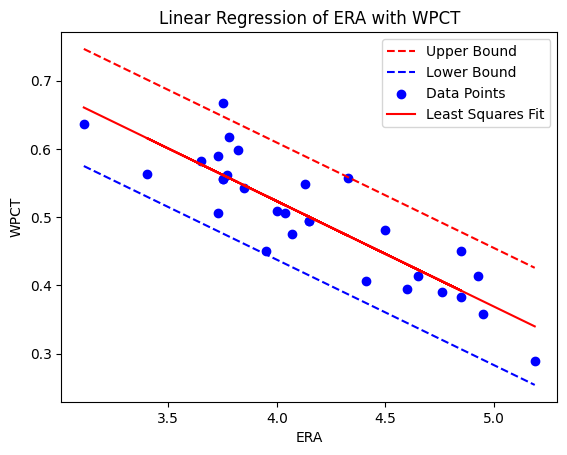

In [7]:
# ERA has the highest correlation coefficient, so I graph it

era_residual_fit, era_mean_of_residual, era_residual_standard_dev = dal.calculate_residuals(era, win_percentage_pitch_list, 1)
era_slope_intercept = dal.least_squares_coefficient(era, win_percentage_pitch_list)
era_upper_boundy, era_upper_boundx, era_lower_boundx, era_lower_boundy = dal.error_bar_bounds(era, era_mean_of_residual, era_residual_standard_dev, era_slope_intercept)

plt.plot(era_upper_boundx, era_upper_boundy, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(era_lower_boundx, era_lower_boundy, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(era, win_percentage_pitch_list, x_axis = 'ERA', y_axis = 'WPCT', title = 'Linear Regression of ERA with WPCT')

[[np.float64(-0.14828798648173258), np.float64(1.1121242471143873)]]


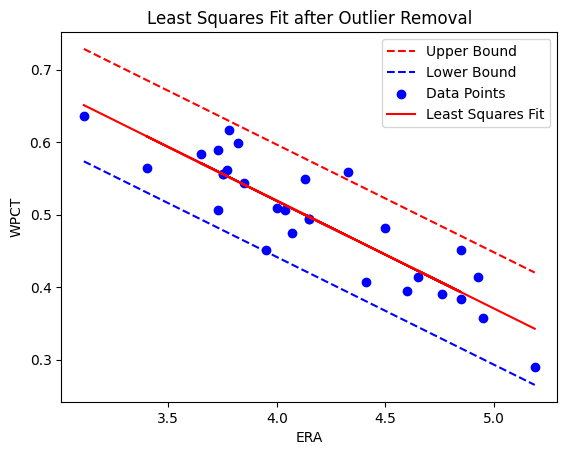

In [8]:
# After removing outliers
era_outliers = dal.determine_outliers(era_residual_fit, era_mean_of_residual, era_residual_standard_dev, n = 2)

new_era, era_new_wpct = dal.remove_outliers(era, win_percentage_pitch_list, era_outliers)

era_slope_intercept_new = dal.least_squares_coefficient(np.array(new_era), np.array(era_new_wpct))
era_residual_data_new, era_mean_of_residual_new, era_residual_standard_dev_new = dal.calculate_residuals(new_era, era_new_wpct)

era_upper_boundy_new, era_upper_boundx_new, era_lower_boundx_new, era_lower_boundy_new = dal.error_bar_bounds(new_era, era_mean_of_residual_new, era_residual_standard_dev_new, era_slope_intercept_new)

plt.plot(era_upper_boundx_new, era_upper_boundy_new, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(era_lower_boundx_new, era_lower_boundy_new, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(new_era, era_new_wpct, title = "Least Squares Fit after Outlier Removal", x_axis = 'ERA', y_axis='WPCT')

print(era_slope_intercept_new)

# RMSE of Both RBI and ERA

In [9]:
# RBI RMSE
print("RBI RMSE before outlier removal:", dal.RMSE(rbi, win_percentage_hitting_list))
print("RBI RMSE after outlier removal:", dal.RMSE(new_rbi, new_wpct))

# ERA RMSE
print("RBI RMSE before outlier removal:", dal.RMSE(era, win_percentage_pitch_list))
print("RBI RMSE after outlier removal:", dal.RMSE(new_era, era_new_wpct))

RBI RMSE before outlier removal: 0.05040115761270839
RBI RMSE after outlier removal: 0.04626525082700914
RBI RMSE before outlier removal: 0.042885596284616224
RBI RMSE after outlier removal: 0.038746032228939555
